# Electric Vehicles Market Size Analysis using Python

In [60]:
import pandas as pd
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
# df.head
print(df.shape)

(177866, 17)


In [3]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
# checking for null values in each column
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

>Dropping rows with missing values using **dropna()** method

In [6]:
df = df.dropna()
df.shape

(177473, 17)

**Analysis on EV Adoption Over Time**

>Below code visualizes the adoption of electric vehicles over time using a bar plot. It counts the number of vehicle registrations per year, sorts the data by year, and then creates a bar plot to show the trend of EV adoption.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\AppData\Local\Temp\ipykernel_12540\3821465763.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="YlOrBr")


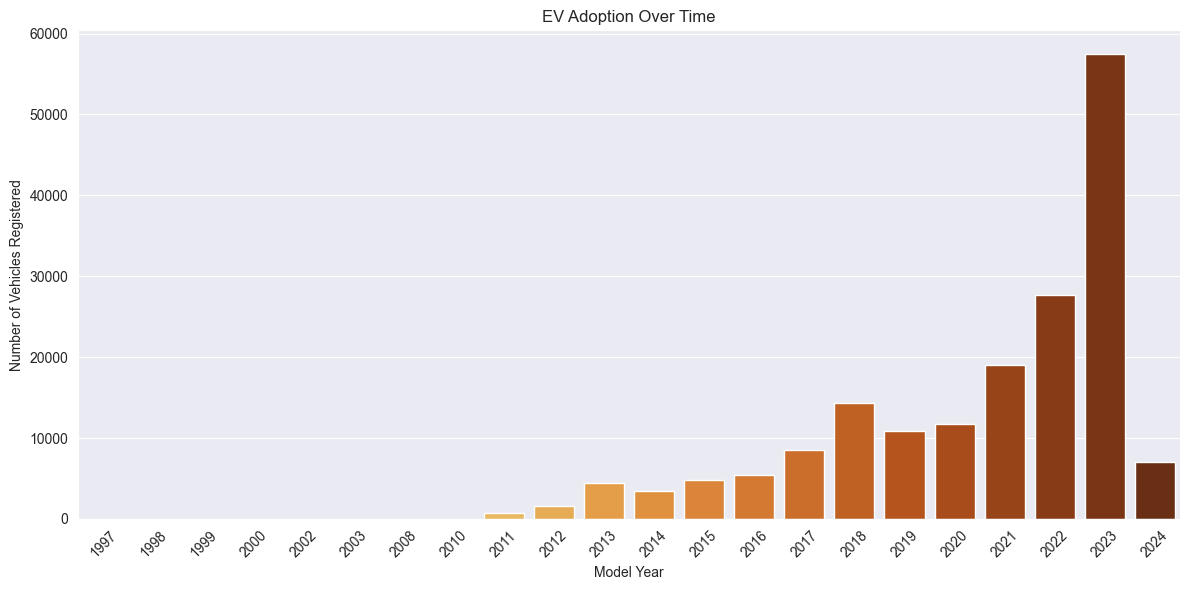

In [8]:
sns.set_style("darkgrid")

# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = df['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="YlOrBr")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

>From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

**Analysis on Geographical Distribution Of EV**

>This code analyzes the geographical distribution of EV registrations at the county and city levels. It first identifies the top 3 counties with the highest number of EV registrations, then filters the data to focus on these counties. It further analyzes the distribution of EVs within the cities of these counties and visualizes the top 10 cities with the highest number of EV registrations, using a bar plot to compare the numbers across different counties. The resulting plot provides a clear visual representation of the concentration of EV registrations in the top counties and cities.

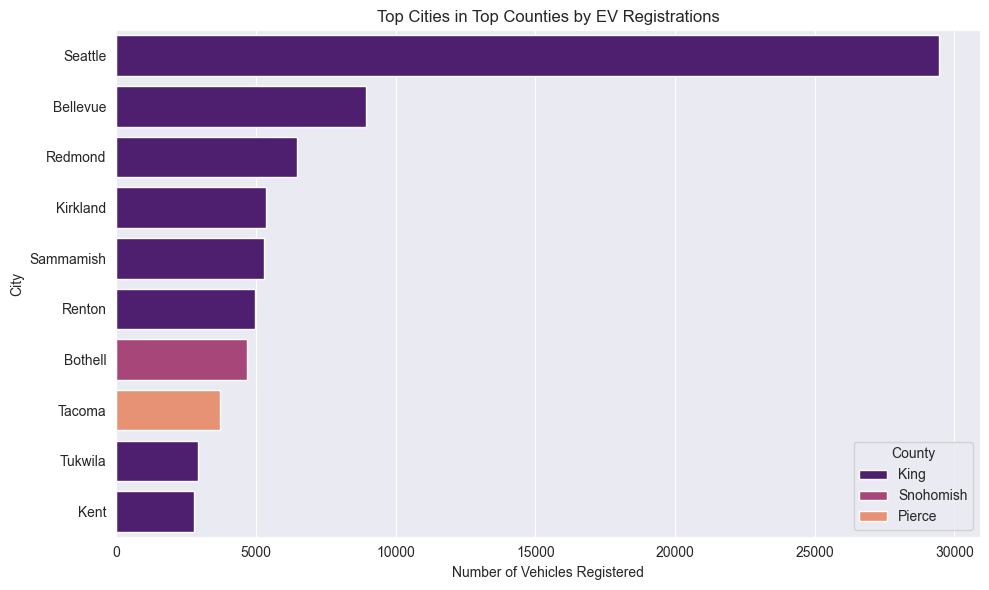

In [9]:
# Let's start by selecting the top 3 counties based on EV registrations
# giving the number of EV registrations per county
# geographical distribution at county level
ev_county_distribution = df['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = df[df['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

**Analyze and visualize the distribution of electric vehicle types**

>Below code effectively visualizes the distribution of different electric vehicle types registered. It counts the number of each type of electric vehicle and displays these counts in a horizontal bar plot.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12540\1057993814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_type_distribution.index, y = ev_type_distribution.values, palette = 'rocket')


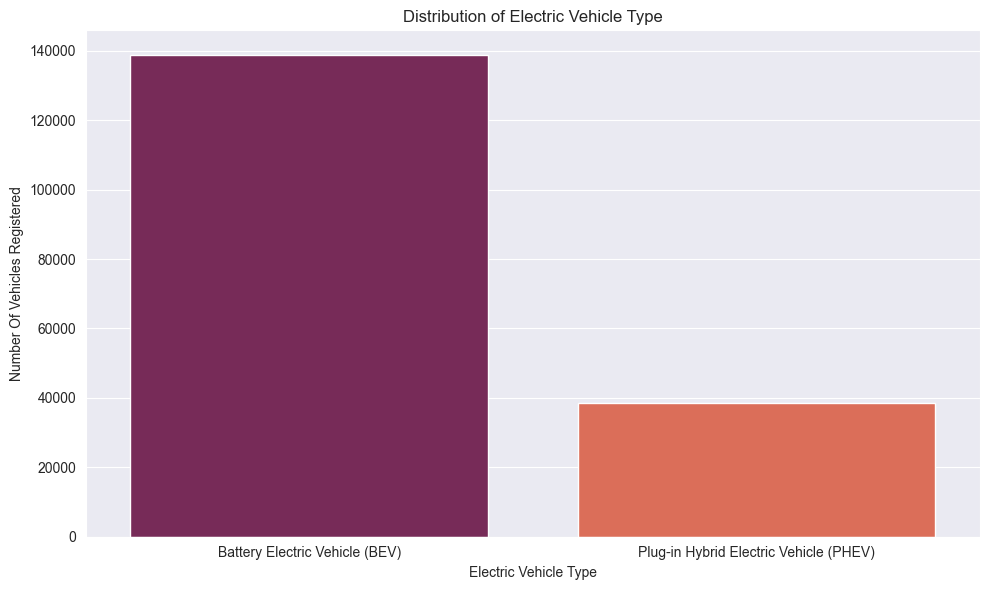

In [10]:
ev_type_distribution = df['Electric Vehicle Type'].value_counts()
# ev_type_distribution.values

plt.figure(figsize = (10,6))
sns.barplot(x = ev_type_distribution.index, y = ev_type_distribution.values, palette = 'rocket')
plt.title('Distribution of Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number Of Vehicles Registered')
plt.tight_layout()
plt.show()           

**Analyzing the popularity of EV manufacturers**
>Below code effectively visualizes the popularity of different EV manufacturers by counting the number of vehicles registered for each make and displaying the top 10 in a horizontal bar plot. 

C:\Users\Admin\AppData\Local\Temp\ipykernel_12540\3162890745.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_manufacturers.values, y=ev_manufacturers.index, palette = "cubehelix")


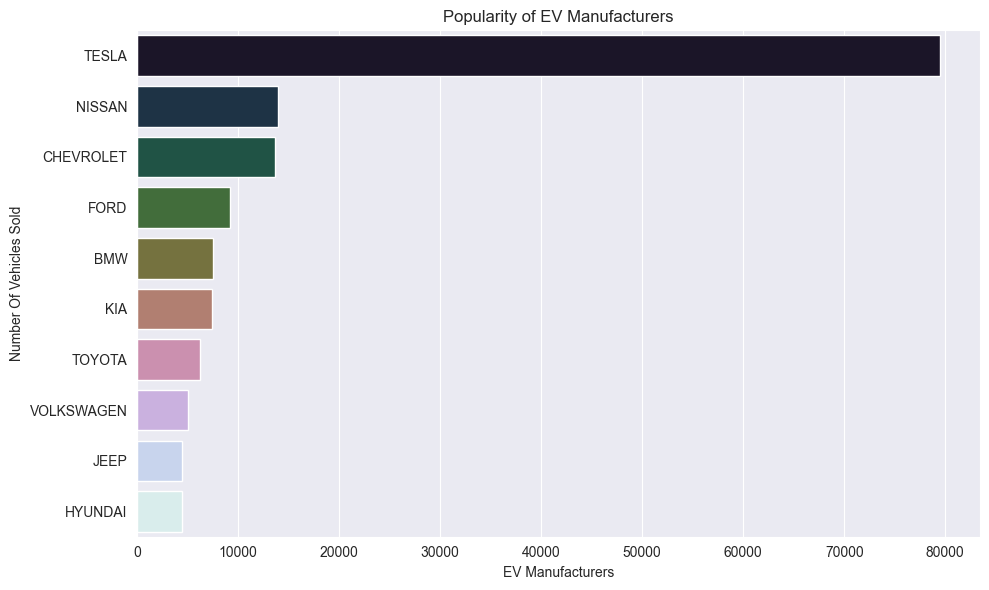

In [13]:
# analyzing the popularity of EV manufacturers
ev_manufacturers = df['Make'].value_counts().head(10)  #Taking top 10 EV manufacturer
# ev_manufacturers

plt.figure(figsize = (10,6))
sns.barplot(x = ev_manufacturers.values, y=ev_manufacturers.index, palette = "cubehelix")
plt.title('Popularity of EV Manufacturers')
plt.xlabel('EV Manufacturers')
plt.ylabel('Number Of Vehicles Sold')
# for index, value in enumerate(ev_manufacturers.values):          #Adding annotations to the bars
#     plt.text(value, index, str(value))
plt.tight_layout()
plt.show()

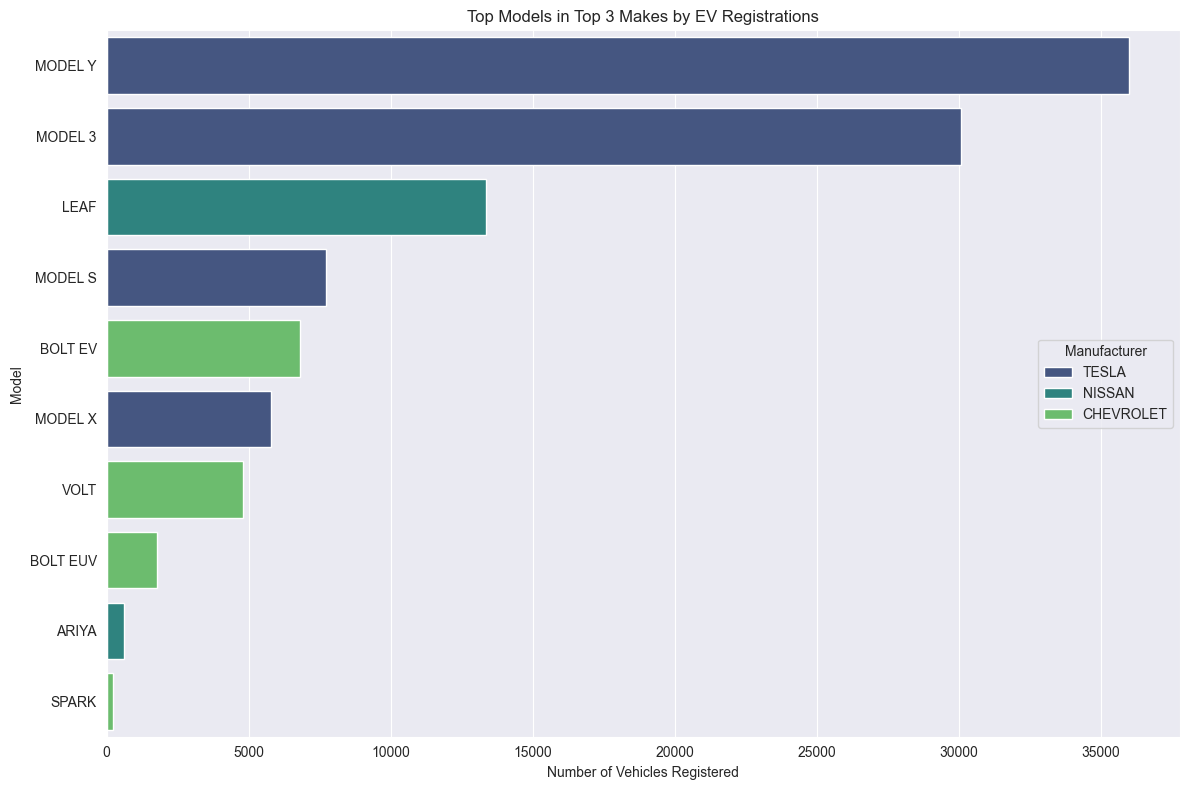

In [31]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_manufacturers = ev_manufacturers.head(3).index

# filtering the dataset for these top manufacturers
top_manufacturers_data = df[df['Make'].isin(top_3_manufacturers)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_manufacturers = top_manufacturers_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_manufacturers.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Manufacturer', loc='center right')
plt.tight_layout()
plt.show()

>The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. The code analyzes and visualizes the distribution of EV models for the top 3 manufacturers based on the number of registered vehicles. It filters the data to include only the top 3 manufacturers, calculates the popularity of each model within these manufacturers, and creates a bar plot to display the top 10 models.

**Analyzing the distribution of electric range**
>Below provided code snippet creates a histogram to analyze the distribution of the electric range of vehicles in the dataset.

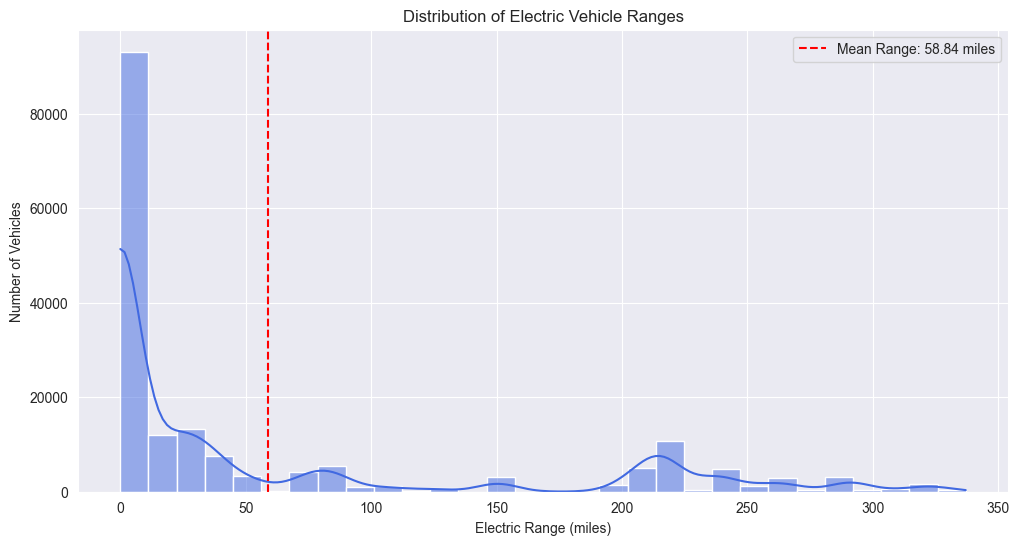

In [38]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')

# Adding a Vertical Line for the Mean
plt.axvline(df['Electric Range'].mean(), color='Red', linestyle='--', label=f'Mean Range: {df["Electric Range"].mean():.2f} miles')

plt.legend()
plt.show()

**Analyzing Average electric range by model year**
>Now, let’s delve into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time. A positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges and potentially addressing one of the major concerns regarding the EV market.

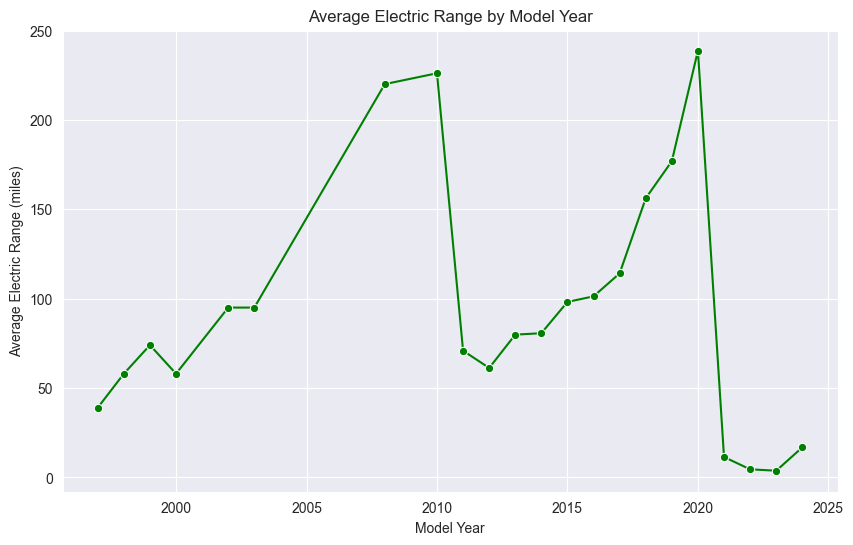

In [49]:
average_electric_range_by_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()
# average_electric_range

plt.figure(figsize =(10,6))
sns.lineplot(x = 'Model Year', y = 'Electric Range', data = average_electric_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

>The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:

>>There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
There is a noticeable peak around the year 2020 when the average range reaches its highest point.
Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.
>>
>>The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.

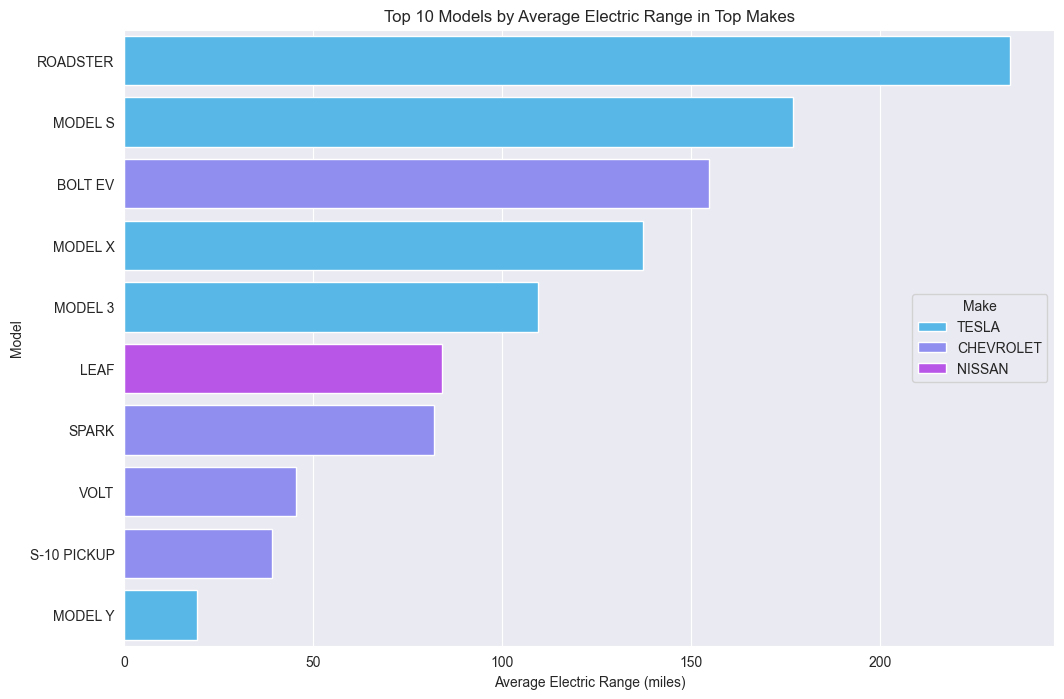

In [50]:
average_range_by_model = top_manufacturers_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

>The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

# Estimated Market Size Analysis of Electric Vehicles in the United States

In [54]:
# calculate the number of EVs registered each year
ev_registration_counts = df['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: count, dtype: int64

In [56]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79092.26358070358, 2025: 119565.00850312428, 2026: 180748.2882793602, 2027: 273240.0066284026, 2028: 413061.179903938, 2029: 624431.02841697}


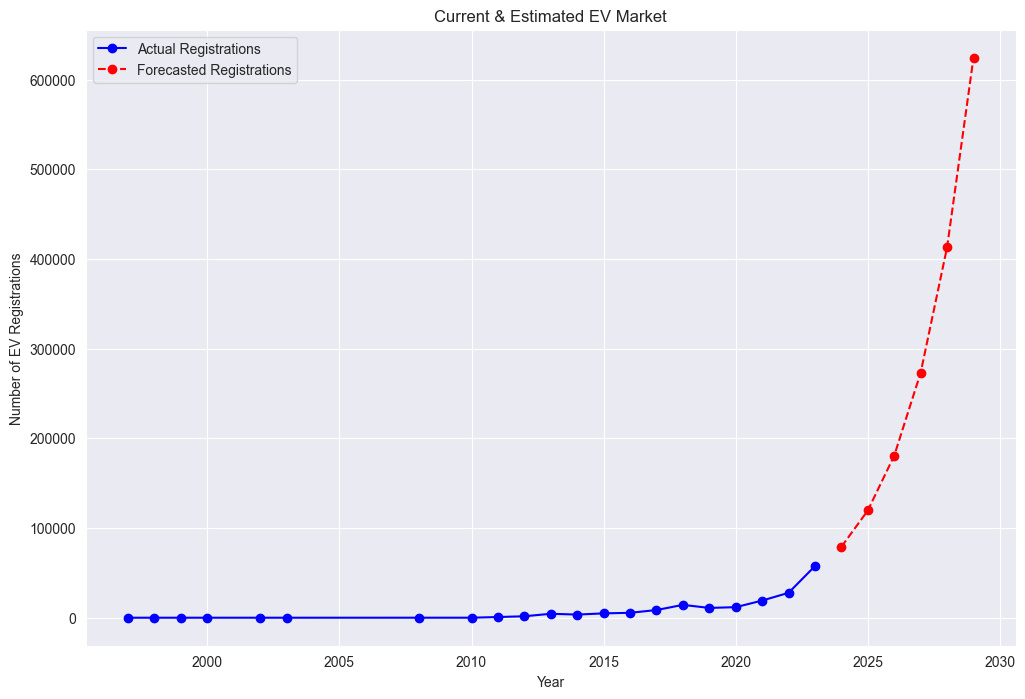

In [59]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

**From the above graph, we can see:**
- The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
- The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

## Summary
>So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. From our market size analysis of electric vehicles, we found a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.